## SpeechSlice Demonstration

In [1]:
from segmentation import *
import sounddevice as sd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa

In [2]:
# Instantiate a Segmentation instance to start using SpeechSlice functions 
speechSlice = Segmentation()

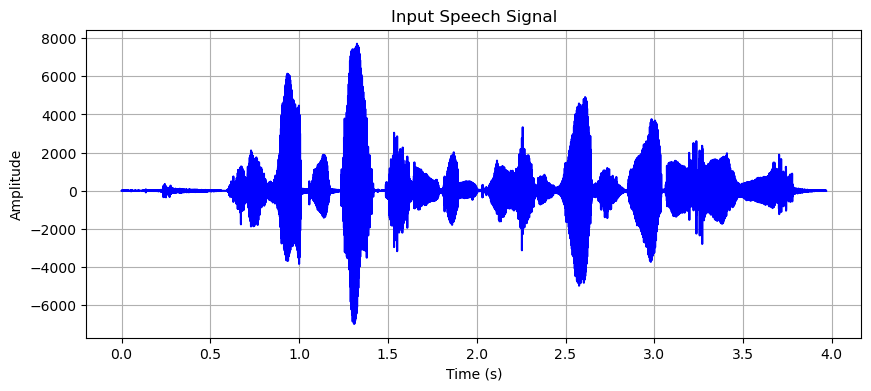

In [3]:
# running tests on input signal 1

# plot and play input signal 1 
sample_rate, audio_data = wavfile.read("demo_audio\SA1.WAV.wav")
sd.play(audio_data, sample_rate)
sd.wait()

audio_data, sample_rate = speechSlice.input_and_plot("demo_audio\SA1.WAV.wav", True) 


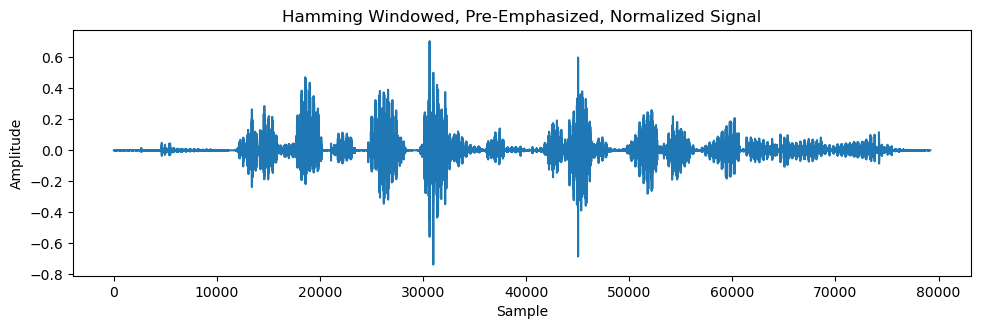

In [4]:
# short time window segmentation, normalize, and pre-emphasize
hamming_short_windows, hamming_signal = speechSlice.split_window_preemphasize(audio_data, sample_rate, 25, 5, plot=True)


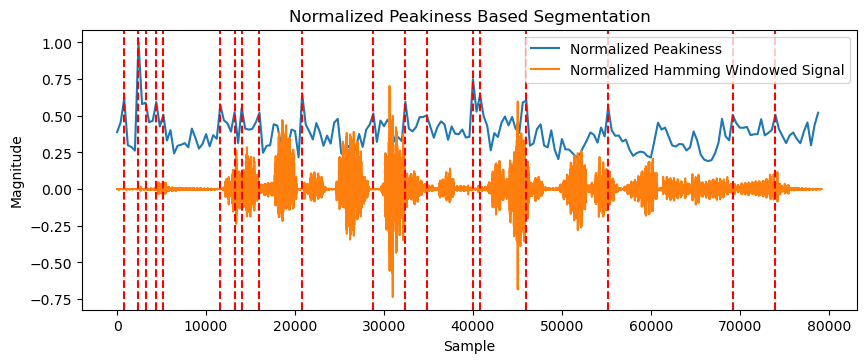

In [5]:
# run peakiness segmentation 
peakiness_segmentation_boundaries = speechSlice.peakiness_segmentation(hamming_short_windows, peakiness_threshold=0.5)

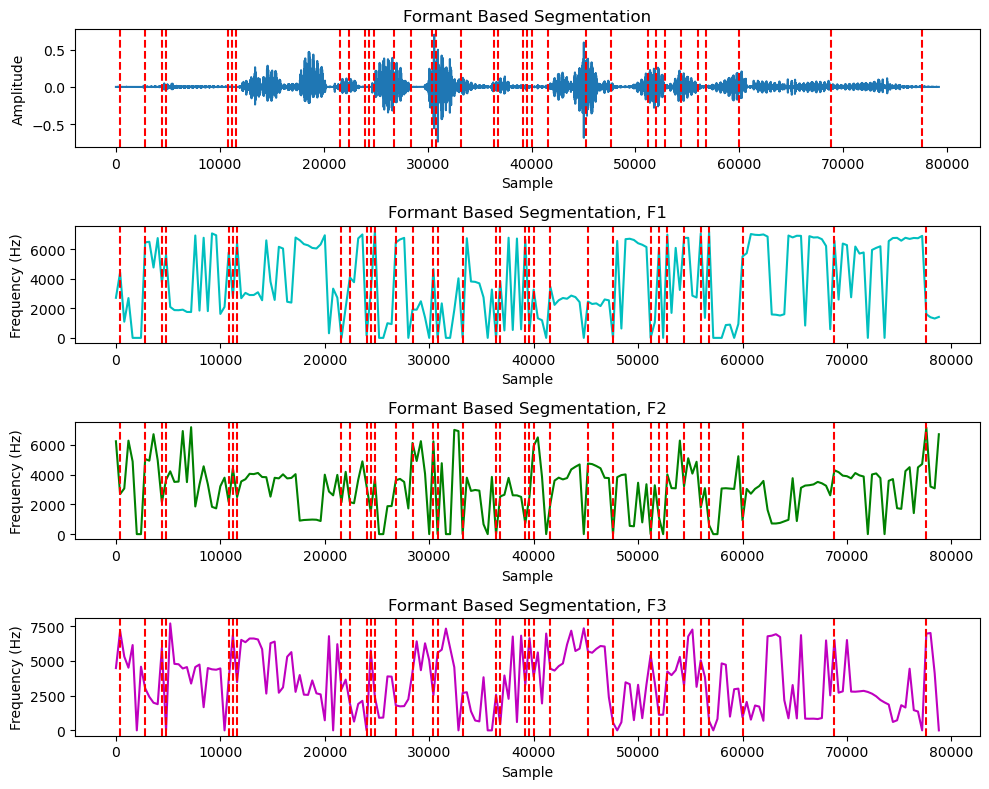

In [6]:
# run formant segmentation
formant_segmentation_boundaries, formants_at_boundaries = speechSlice.formant_segmentation(hamming_short_windows, sample_rate)

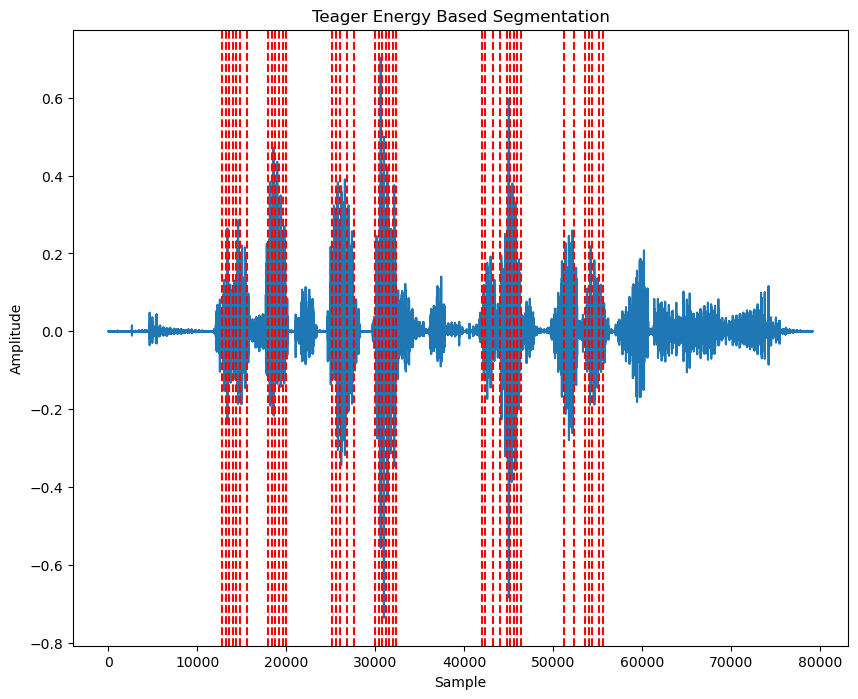

In [10]:
# teager energy based segmentation 
teager_segmentation_boundaries = speechSlice.teager_energy_segmentation(hamming_short_windows, energy_threshold=0.05)

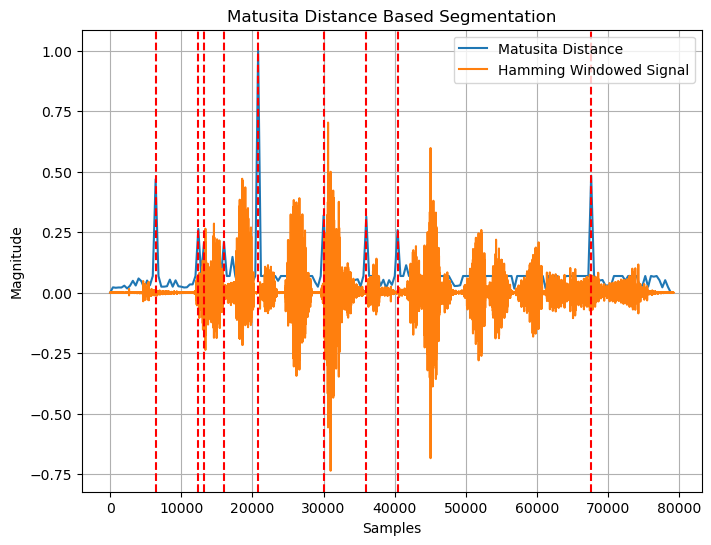

In [13]:
# Matusita distance based segmentation 
matusita_segmentation_boundaries = speechSlice.matusita_dist_segmentation(hamming_short_windows, matusita_threshold=0.2)

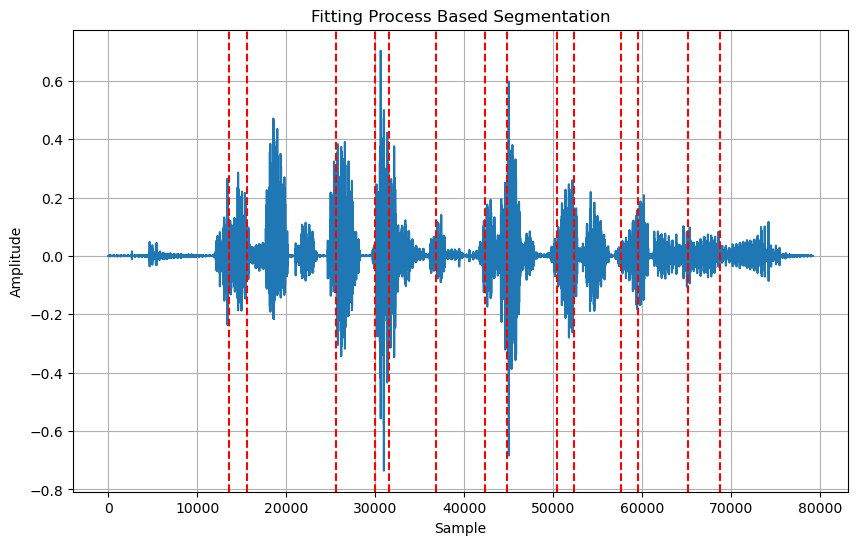

[13600 15600 25600 30000 31600 36800 42400 44800 50400 52400 57600 59600
 65200 68800]


In [31]:
# Fitting process segmentation 
fitting_proc_boundaries = speechSlice.fitting_proc_segmentation(hamming_short_windows)
print(fitting_proc_boundaries)

13600
15600
25600
30000
31600
36800
42400
44800
50400
52400
57600
59600
65200
68800


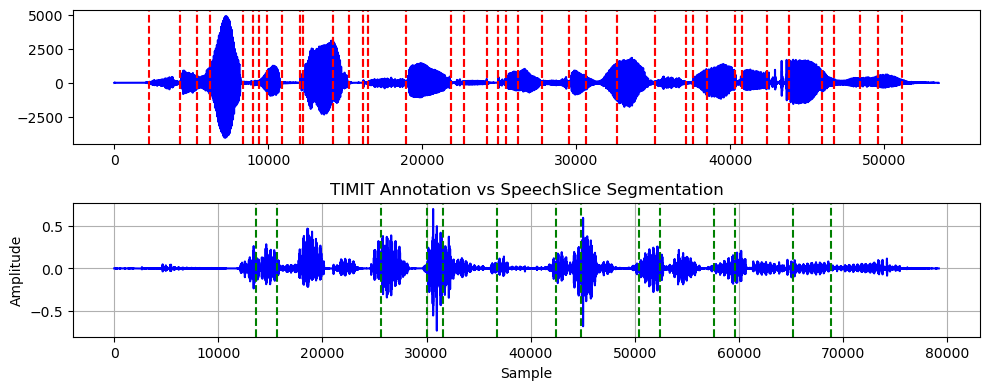

In [34]:
# compare with ground truth by examining the .phn file 
boundaries = [] 
with open("demo_audio\SA1.PHN", "r") as file:
    # Iterate through each line in the file
    for line in file:
        parts = line.split()
        # Append the extracted numbers to the list
        boundaries.append(int(parts[0]))
        boundaries.append(int(parts[1]))
    samples = boundaries[-1]
    boundaries = boundaries[2:]
    boundaries = boundaries[:-2]
    sample_rate, audio_data = wavfile.read("demo_audio\SA1.WAV.wav")
   

plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(audio_data, color='b')
for i in range(len(boundaries)):
    plt.axvline(x=boundaries[i], color='r', linestyle='--') 

plt.subplot(2, 1, 2)
plt.plot(hamming_signal, color='b')
for i in fitting_proc_boundaries:
    print(i)
    plt.axvline(x=i, color='g', linestyle='--') 

plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('TIMIT Annotation vs SpeechSlice Segmentation')
plt.grid(True)
plt.tight_layout()
plt.show()
